### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from statsmodels.graphics.tsaplots import plot_pacf
import tensorflow as tf
import yaml
import math
import json
import datetime

2025-06-11 19:06:22.077443: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Making a whole dataset (concat xls files)

In [2]:
dir = "./data"
ds = pd.read_csv(dir + "/" + "LRBM.csv")

### Column analysis

In [3]:
ds

,soil_temperature_7_to_28cm,pressure_msl,relative_humidity_2m,wind_speed_100m,wind_direction_10m,cloud_cover,dew_point_2m,time
0,2.2,1028.2,79,3.16,313,100,-3.9,2020-01-01T00:00
1,2.2,1028.3,80,2.28,315,96,-3.6,2020-01-01T01:00
2,2.1,1028.1,81,2.66,297,97,-3.4,2020-01-01T02:00
3,2.1,1029.1,80,3.26,317,98,-4.0,2020-01-01T03:00
4,2.1,1029.5,81,3.33,309,96,-3.7,2020-01-01T04:00
...,...,...,...,...,...,...,...,...
47611,21.0,1015.6,62,0.32,58,47,19.8,2025-06-06T19:00
47612,21.1,1015.8,83,1.61,56,10,22.8,2025-06-06T20:00
47613,21.2,1016.1,81,1.41,135,1,21.0,2025-06-06T21:00
47614,21.2,1016.4,85,0.73,117,1,20.0,2025-06-06T22:00


In [4]:
ds.describe()

,soil_temperature_7_to_28cm,pressure_msl,relative_humidity_2m,wind_speed_100m,wind_direction_10m,cloud_cover,dew_point_2m
count,47616.000000,47616.000000,47616.000000,47616.000000,47616.000000,47616.000000,47616.000000
mean,10.623406,1017.431882,74.722509,3.640946,173.519237,60.459803,5.934635
std,7.556055,8.225579,17.096417,2.143938,93.689373,41.028667,7.818671
min,-1.000000,988.200000,15.000000,0.000000,1.000000,0.000000,-23.000000
25%,3.700000,1012.200000,63.000000,1.930000,101.000000,15.000000,0.100000
50%,10.150000,1016.700000,78.000000,3.350000,130.000000,78.000000,5.900000
75%,17.600000,1022.500000,89.000000,5.020000,270.000000,100.000000,12.300000
max,26.300000,1046.600000,100.000000,14.480000,360.000000,100.000000,26.100000


In [5]:
# ds["time"].value_counts()
# ds["time"].isna().value_counts()

In [6]:
ds["soil_temperature_7_to_28cm"].value_counts().index
# ds["soil_temperature_7_to_28cm (°C)"].isna().value_counts()
# ds[ds["soil_temperature_7_to_28cm (°C)"] == "-"]

Index([ 0.3,  0.4,  0.6,  0.2,  0.5,  0.7,  4.5,  2.8,  4.7,  4.9,
       ...
       25.3, 25.5, 25.8, 25.7, 25.6, 26.0, 26.1, 25.9, 26.2, 26.3],
      dtype='float64', name='soil_temperature_7_to_28cm', length=274)

In [7]:
ds["pressure_msl"].value_counts().index
# ds[ds["pressure_msl (hPa)"].isna() == True]
# ds[ds["pressure_msl (hPa)"] == "-"]

Index([1016.6, 1014.8, 1017.0, 1016.4, 1016.7, 1016.5, 1014.4, 1015.4, 1015.3,
       1014.9,
       ...
        988.2,  988.5,  989.4,  990.9, 1046.0, 1045.5, 1045.1,  992.2,  992.4,
        996.2],
      dtype='float64', name='pressure_msl', length=550)

In [8]:
ds["relative_humidity_2m"].value_counts().index
# ds[ds["relative_humidity_2m (%)"].isna() == True]
# ds[ds["relative_humidity_2m (%)"] == "-"]

Index([ 94,  92,  91,  95,  90,  89,  93,  88,  87,  96,  85,  86,  83,  84,
        82,  81,  80,  79,  97,  77,  78,  76,  74,  75,  72,  71,  73,  69,
        70,  67,  68,  66,  63,  65,  64,  98,  62,  61,  60,  57,  59,  58,
        55,  56,  52,  54,  51,  53,  50,  48,  47,  99,  49,  46,  45,  43,
        44,  41,  42, 100,  40,  38,  39,  37,  35,  36,  33,  34,  31,  32,
        30,  29,  27,  28,  25,  24,  26,  21,  22,  19,  23,  17,  16,  18,
        15,  20],
      dtype='int64', name='relative_humidity_2m')

In [9]:
ds["dew_point_2m"].value_counts().index
# ds["dew_point_2m (°C)"].isna().value_counts()
# ds[ds["dew_point_2m (°C)"] == "-"]
# ds[ds["dew_point_2m (°C)"] == -23]

Index([  1.6,   4.1,  10.1,   5.5,   1.1,   2.5,   0.8,  10.8,   4.3,   5.0,
       ...
       -19.5, -20.2, -22.5, -22.6, -22.4, -22.3, -23.0, -21.8, -18.9, -18.3],
      dtype='float64', name='dew_point_2m', length=437)

In [10]:
ds["wind_direction_10m"].value_counts().index
# ds[ds["wind_direction_10m (°)"].isna() == True]
# ds[ds["wind_direction_10m (°)"] == "calm."]

Index([ 90, 108, 117, 103,  99, 106, 101, 111, 105, 107,
       ...
       226,  19,  64,  46,  44, 206, 359,  26,   1, 179],
      dtype='int64', name='wind_direction_10m', length=359)

In [11]:
ds["wind_speed_100m"].value_counts().index
# ds[ds["wind_speed_100m (m/s)"].isna() == True]
# ds[ds["wind_speed_100m (m/s)"] == "-"]

Index([ 1.84,   1.3,   1.7,  2.06,   1.0,  2.28,  2.33,  2.42,  1.75,  3.61,
       ...
        10.0, 12.25,  13.2, 13.95, 13.14, 13.07, 12.78, 11.53, 11.18, 10.58],
      dtype='float64', name='wind_speed_100m', length=1132)

In [12]:
ds["cloud_cover"].value_counts().index
# ds["cloud_cover (%)"].isna().value_counts()
# ds[ds["cloud_cover (%)"] == "N/D"]


Index([100,   0,  99,   1,  98,  97,   2,  96,   3,  95,
       ...
        68,  71,  56,  74,  57,  72,  52,  65,  63,  66],
      dtype='int64', name='cloud_cover', length=101)

### Column modifiers

#### Transforming values

In [13]:
ds["time"] = ds["time"].apply(lambda date : datetime.datetime.fromisoformat(date))

In [14]:
ds["Year"] = ds["time"].apply(lambda date : date.year)

In [15]:
ds["Month"] = ds["time"].apply(lambda date : date.month)

In [16]:
ds["Day"] = ds["time"].apply(lambda date : date.day)

In [17]:
ds["time"] = ds["time"].apply(lambda date : date.hour)

In [18]:
# ds["wind_direction_10m"] = ds["wind_direction_10m"].apply(lambda direction : round(direction / 10))

In [19]:
ds["cloud_cover"] = ds["cloud_cover"].apply(lambda percentage : round((percentage / 100) * 8))

In [20]:
wv = ds.pop("wind_speed_100m")

# Convert to radians.
wd_rad = ds.pop("wind_direction_10m")*np.pi / 180

# Calculate the wind x and y components.
ds['Wx'] = wv * np.cos(wd_rad)
ds['Wy'] = wv * np.sin(wd_rad)

#### Renaming columns

In [21]:
ds = ds.rename(columns={
    "soil_temperature_7_to_28cm" : "Temperature",
    "relative_humidity_2m" : "Relative Humidity",
    "pressure_msl" : "Pressure",
    "wind_direction_10m" : "Wind direction",
    "wind_speed_100m" : "Wind speed",
    "cloud_cover" : "Clouds",
    "dew_point_2m" : "Dew point",
    "time" : "Time"
    })

#### Eliminate the time element

In [22]:
config = yaml.safe_load(open("../config.yaml"))

index = config["data"]["index"]

In [23]:
if "Time" not in index:
    # ds = ds[ds["Time"] == 12]
    ds = ds.drop("Time", axis=1)

In [24]:
ds = ds.groupby(["Year", "Month", "Day"]).mean()

In [25]:
ds.loc[2025, 5, 1]

Temperature            13.891667
Pressure             1018.741667
Relative Humidity      68.250000
Clouds                  0.750000
Dew point               8.795833
Wx                      1.712282
Wy                     -0.913786
Name: (2025, 5, 1), dtype: float64

In [26]:
ds = ds.reset_index()

#### Sorting and reindexing

In [27]:
ds = ds.set_index(index)
ds = ds.sort_index()
ds = ds.reset_index()

### Overview of the dataset

In [28]:
ds

,Year,Month,Day,Temperature,Pressure,Relative Humidity,Clouds,Dew point,Wx,Wy
0,2020,1,1,1.887500,1030.916667,80.666667,4.750000,-3.104167,1.654184,-3.854341
1,2020,1,2,1.091667,1033.995833,88.375000,5.750000,-3.433333,0.411647,-0.777030
2,2020,1,3,0.566667,1030.479167,86.416667,4.083333,-4.591667,0.137316,0.804997
3,2020,1,4,0.308333,1023.458333,87.208333,6.375000,-5.566667,-0.084548,0.480246
4,2020,1,5,0.045833,1022.404167,83.750000,4.041667,-4.200000,2.325118,-3.291842
...,...,...,...,...,...,...,...,...,...,...
1979,2025,6,2,16.783333,1017.933333,72.333333,4.541667,14.475000,-0.038610,2.498874
1980,2025,6,3,17.808333,1016.087500,77.166667,4.833333,15.908333,-0.758746,1.983293
1981,2025,6,4,18.000000,1017.587500,84.208333,3.166667,17.091667,-0.339882,2.612104
1982,2025,6,5,19.100000,1016.408333,73.375000,3.375000,17.666667,-0.693272,3.211163


In [29]:
ds[ds.isna().any(axis=1) == True]

,Year,Month,Day,Temperature,Pressure,Relative Humidity,Clouds,Dew point,Wx,Wy


In [30]:
ds[ds["Year"] == 2025]

,Year,Month,Day,Temperature,Pressure,Relative Humidity,Clouds,Dew point,Wx,Wy
1827,2025,1,1,0.358333,1031.645833,83.500000,1.208333,-4.691667,-2.427679,2.058321
1828,2025,1,2,0.275000,1022.095833,78.791667,3.750000,-4.037500,-1.257372,3.655126
1829,2025,1,3,0.200000,1013.129167,91.125000,6.666667,-1.004167,0.147342,-0.647891
1830,2025,1,4,0.200000,1020.916667,79.458333,5.208333,-4.650000,-0.574219,-2.790178
1831,2025,1,5,0.200000,1021.295833,70.125000,6.833333,-6.154167,-0.874892,4.647049
...,...,...,...,...,...,...,...,...,...,...
1979,2025,6,2,16.783333,1017.933333,72.333333,4.541667,14.475000,-0.038610,2.498874
1980,2025,6,3,17.808333,1016.087500,77.166667,4.833333,15.908333,-0.758746,1.983293
1981,2025,6,4,18.000000,1017.587500,84.208333,3.166667,17.091667,-0.339882,2.612104
1982,2025,6,5,19.100000,1016.408333,73.375000,3.375000,17.666667,-0.693272,3.211163


In [31]:
ds.iloc[0:10]

,Year,Month,Day,Temperature,Pressure,Relative Humidity,Clouds,Dew point,Wx,Wy
0,2020,1,1,1.887500,1030.916667,80.666667,4.750000,-3.104167,1.654184,-3.854341
1,2020,1,2,1.091667,1033.995833,88.375000,5.750000,-3.433333,0.411647,-0.777030
2,2020,1,3,0.566667,1030.479167,86.416667,4.083333,-4.591667,0.137316,0.804997
3,2020,1,4,0.308333,1023.458333,87.208333,6.375000,-5.566667,-0.084548,0.480246
4,2020,1,5,0.045833,1022.404167,83.750000,4.041667,-4.200000,2.325118,-3.291842
5,2020,1,6,0.020833,1032.120833,75.583333,1.125000,-6.841667,0.481343,-2.328042
6,2020,1,7,-0.270833,1031.137500,81.541667,0.500000,-8.229167,-1.287471,0.623611
7,2020,1,8,-0.612500,1033.895833,80.125000,0.250000,-9.045833,-1.825055,1.031700
8,2020,1,9,-0.858333,1031.604167,79.625000,6.750000,-7.212500,-1.734762,1.536262
9,2020,1,10,-0.833333,1025.195833,78.500000,6.291667,-4.004167,-2.913540,3.102893


In [32]:
ds.iloc[4050:4060]

,Year,Month,Day,Temperature,Pressure,Relative Humidity,Clouds,Dew point,Wx,Wy


In [33]:
ds.iloc[9400:9408]

,Year,Month,Day,Temperature,Pressure,Relative Humidity,Clouds,Dew point,Wx,Wy


In [34]:
ds.dtypes

Year                   int64
Month                  int64
Day                    int64
Temperature          float64
Pressure             float64
Relative Humidity    float64
Clouds               float64
Dew point            float64
Wx                   float64
Wy                   float64
dtype: object

### Feature Analysis

In [35]:
ds = ds.set_index(index)

#### Frequencies

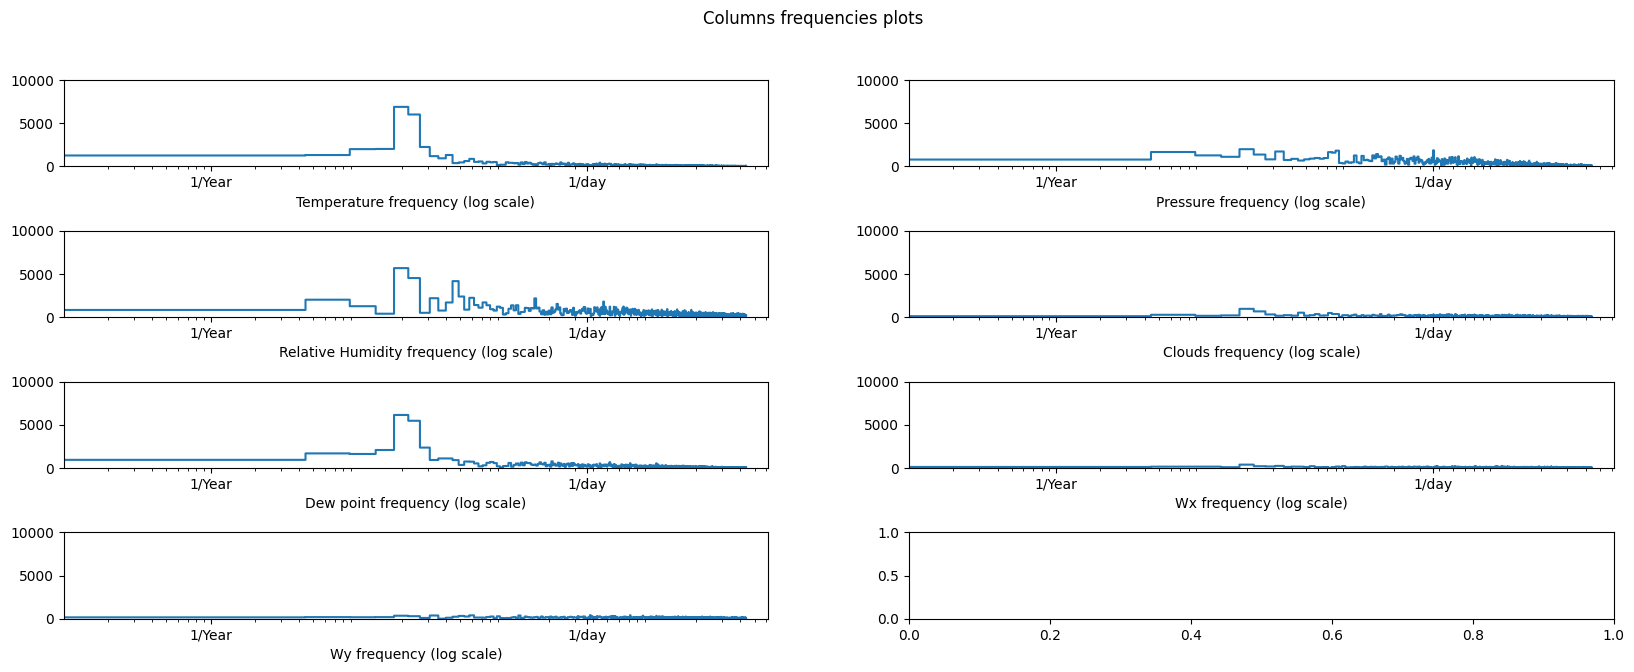

In [36]:
dim = len(ds.columns)
width = 2
rows = int(dim/width) + (1 if dim % width != 0 else 0)

fig, ax = plt.subplots(nrows=rows, ncols=width)
plt.subplots_adjust(hspace = 0.75)

fig.suptitle("Columns frequencies plots")
fig.set_figwidth(20)
fig.set_figheight(7)

for i, col in enumerate(ds.columns):
    fft = tf.signal.rfft(ds[col])
    f_per_dataset = np.arange(0, len(fft))

    n_samples_h = len(ds[col])
    hours_per_year = 24*365.2524
    years_per_dataset = n_samples_h/(hours_per_year)

    f_per_year = f_per_dataset/years_per_dataset
    plot = ax[int(i / width), i % width]
    plot.step(f_per_year, np.abs(fft))
    plot.set_xscale('log')
    plot.set_ylim(0, 10000)
    plot.set_xlim([0.1, max(plot.get_xlim())])
    plot.set_xticks([1, 365.2524], labels=['1/Year', '1/day'])
    _ = plot.set_xlabel(col + ' frequency (log scale)')
pass

#### Normalization

In [37]:
column_indices = {name: i for i, name in enumerate(ds.columns)}

test_size = round(config["data"]["test_size"], 2)
validation_size = round(config["data"]["validation_size"], 2)
train_size = round(1 - test_size - validation_size, 2)

n = len(ds)
train_ds = ds[0:int(n * train_size)]
val_ds = ds[int(n * train_size):int(n * (1 - test_size))]
test_ds = ds[int(n * (1 - test_size)):]

In [38]:
(train_size, validation_size, test_size)

(0.75, 0, 0.25)

In [39]:
train_mean = train_ds.mean()
train_std = train_ds.std()

train_ds = (train_ds - train_mean) / train_std
val_ds = (val_ds - train_mean) / train_std
test_ds = (test_ds - train_mean) / train_std

/var/folders/pw/mrvd6g154ws6l4841tbsfzsc0000gn/T/ipykernel_97235/3182712541.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(ds.keys(), rotation=90)


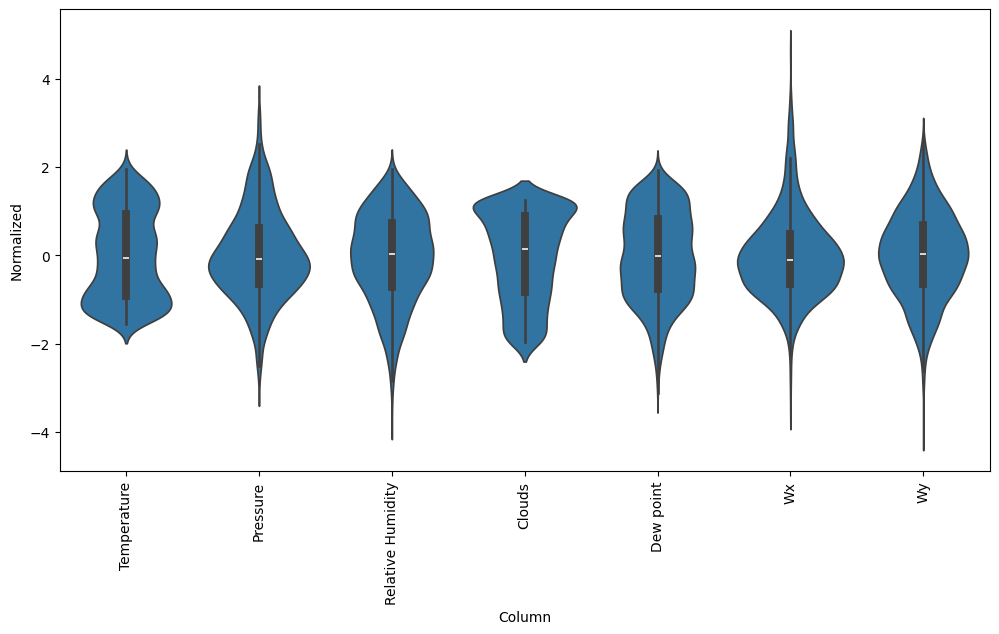

In [40]:
ds_std = (ds - train_mean) / train_std
ds_std = ds_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=ds_std)
_ = ax.set_xticklabels(ds.keys(), rotation=90)

In [41]:
ds = (ds  - train_mean) / train_std

In [42]:
json.dump(
    obj = train_mean.to_dict(), 
    fp = open(f"../data/train_mean.txt", 'w'),
)

In [43]:
json.dump(
    obj = train_std.to_dict(), 
    fp = open(f"../data/train_std.txt", 'w'),
)

#### Partial autocorrelation

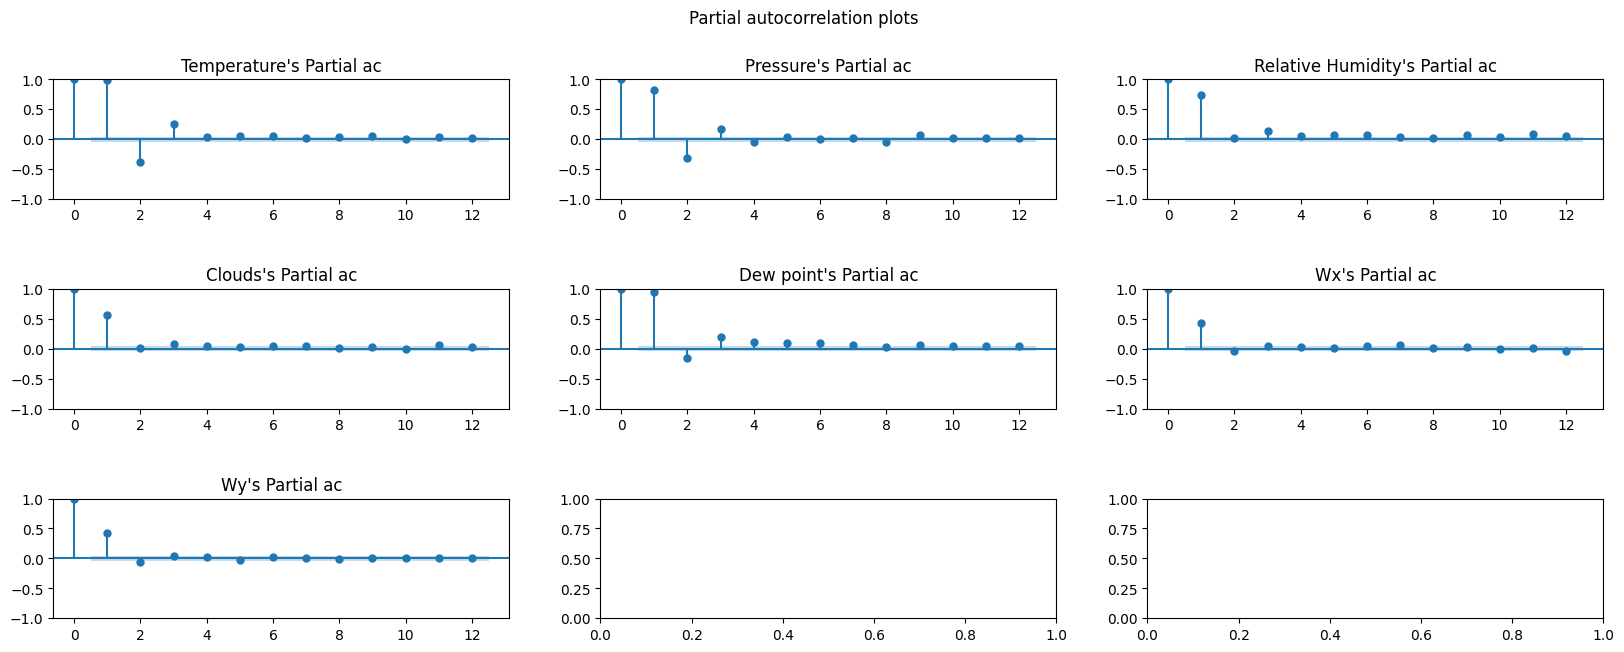

In [44]:
dim = len(ds.columns)
width = 3
rows = int(dim/width) + (1 if dim % width != 0 else 0)

fig, ax = plt.subplots(nrows=rows, ncols=width)
plt.subplots_adjust(hspace = 0.75)

fig.suptitle("Partial autocorrelation plots")
fig.set_figwidth(20)
fig.set_figheight(7)

for i, col in enumerate(ds.columns):
    plot_pacf(ds[col], ax=ax[int(i / width), i % width], lags=12, title=col + "'s Partial ac")
pass

#### Lag correlation plots

In [45]:
def plot_lags(column, lags=1):
    fig, ax = plt.subplots(nrows=1, ncols=lags)

    fig.suptitle(column + " Correlation with lags plots")
    fig.set_figwidth(lags * 5)
    fig.set_figheight(5)

    y = ds[column]
    for i in range(lags):
        ax[i].set_title("Lag " + str(i+1))
        x = pd.DataFrame()
        x[f"{column} Lag {i + 1}"] = y.shift(i + 1)
        sns.regplot(
            x=x[f"{column} Lag {i + 1}"], 
            y=y,
            ax=ax[i],
            line_kws=dict(color="C3"),
            scatter_kws=dict(
                alpha=0.75,
                s=3,
            ),
            lowess=True
            )
    return fig

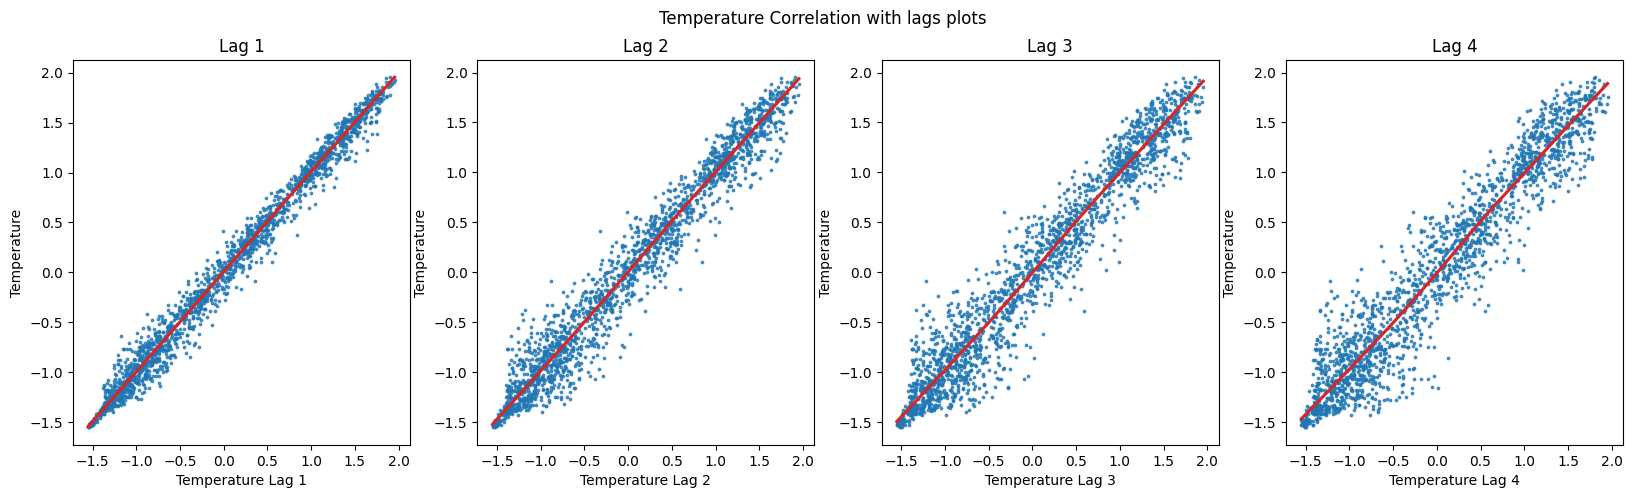

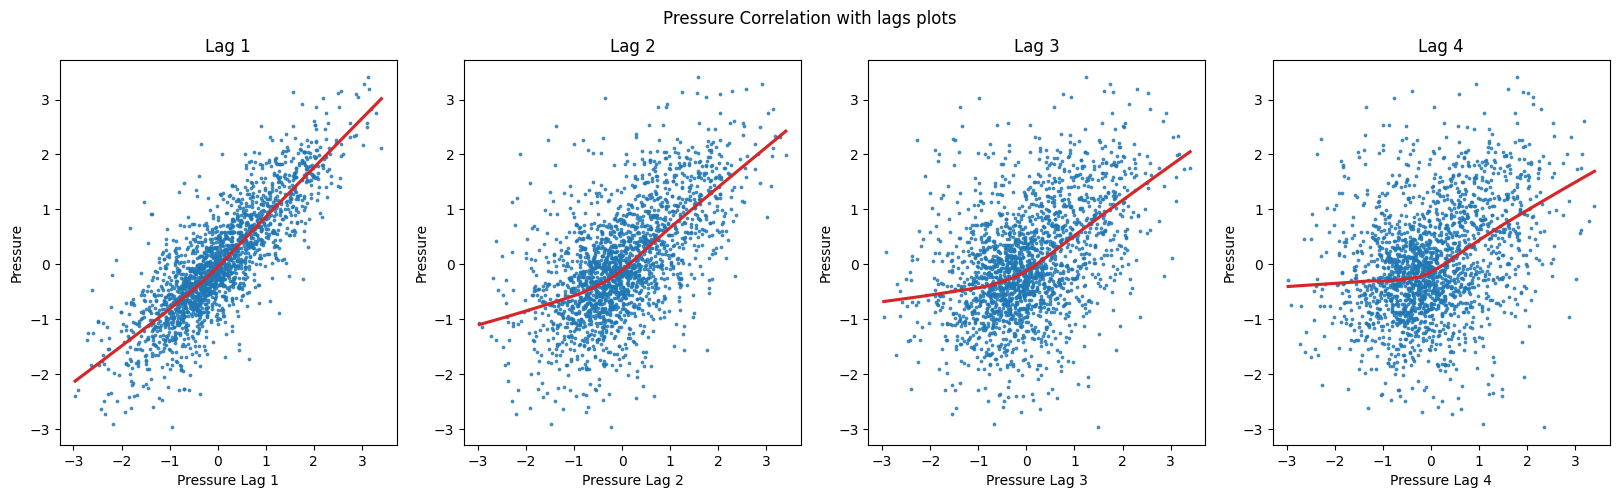

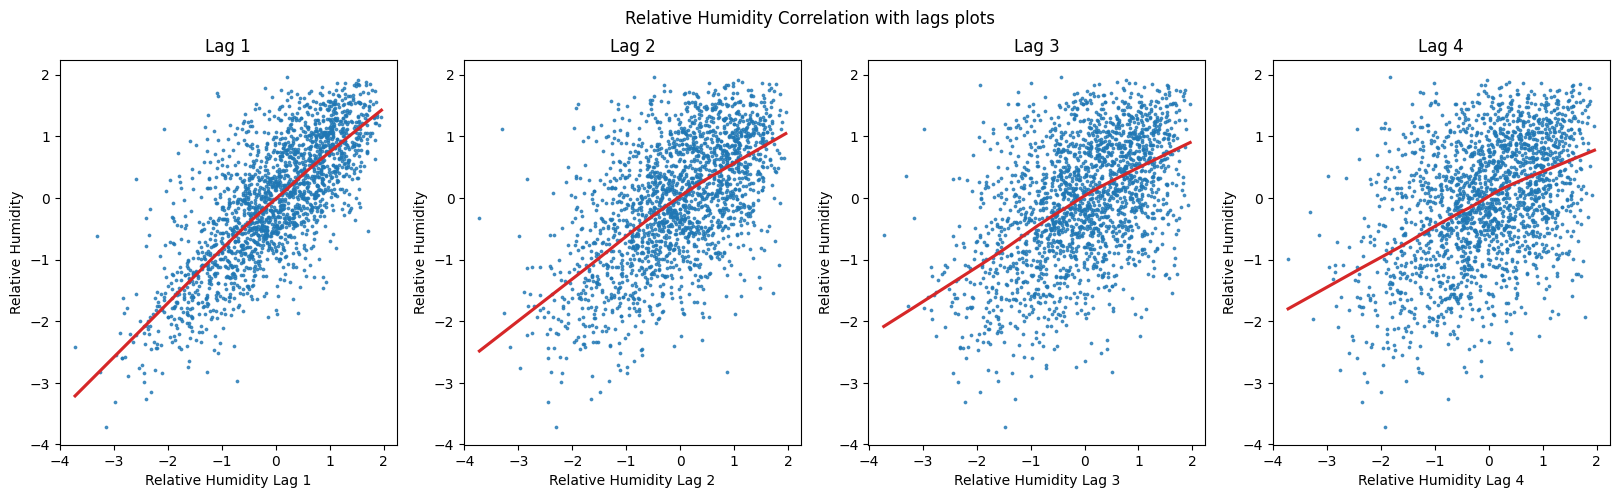

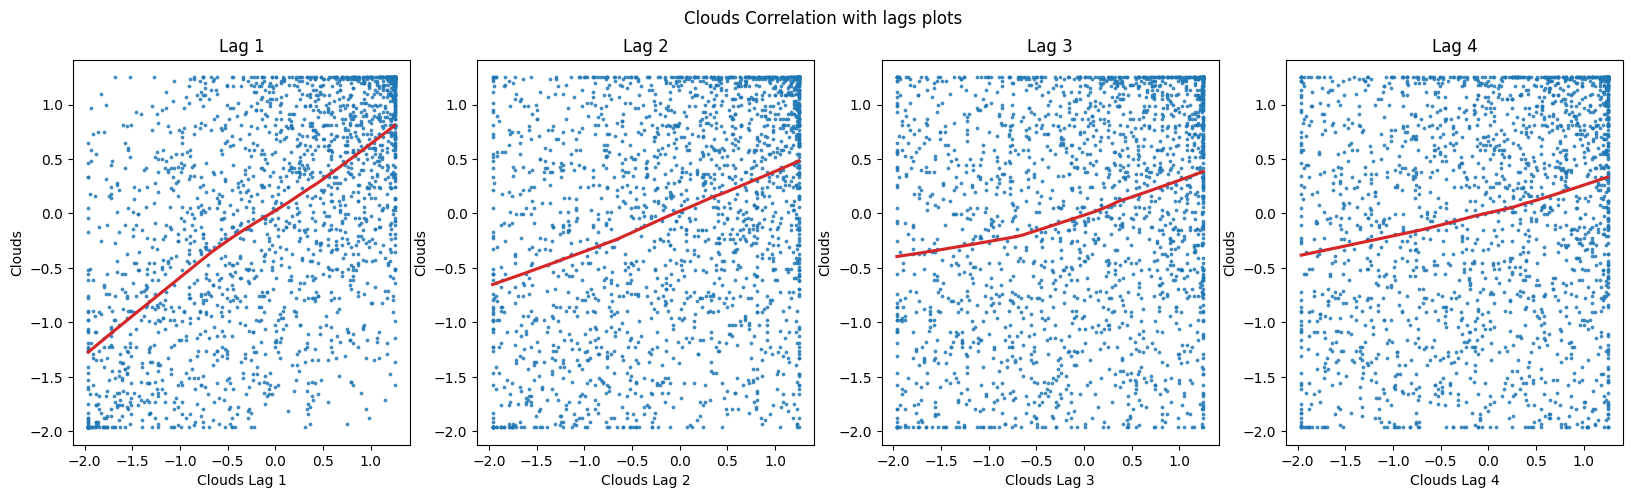

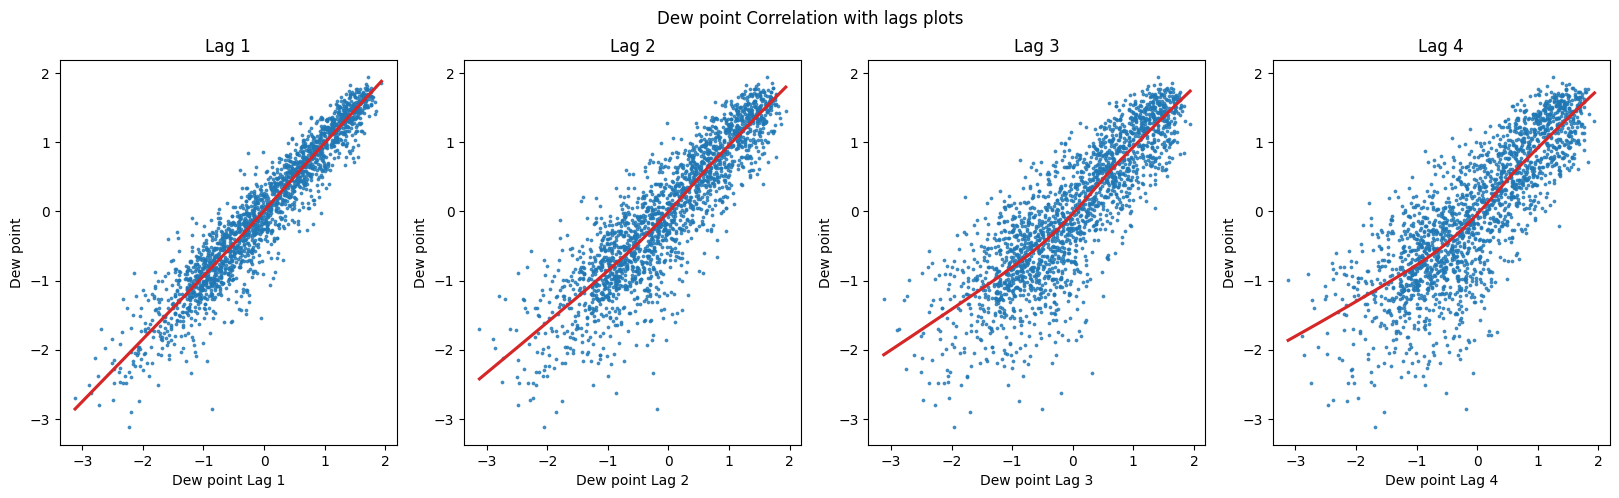

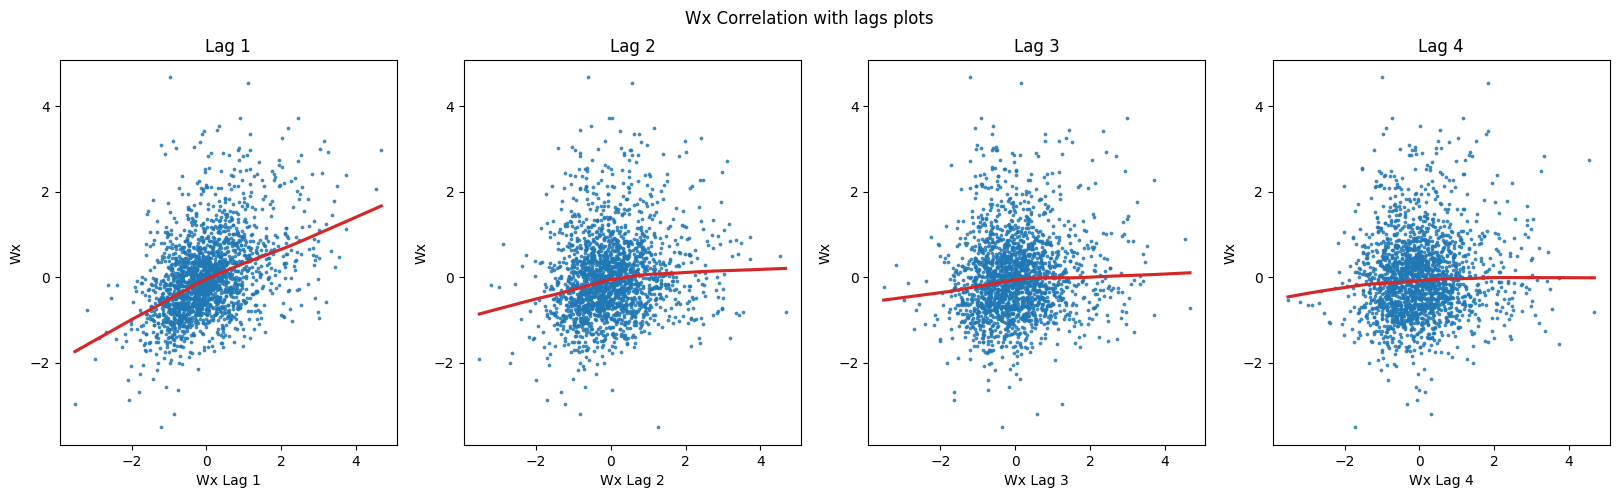

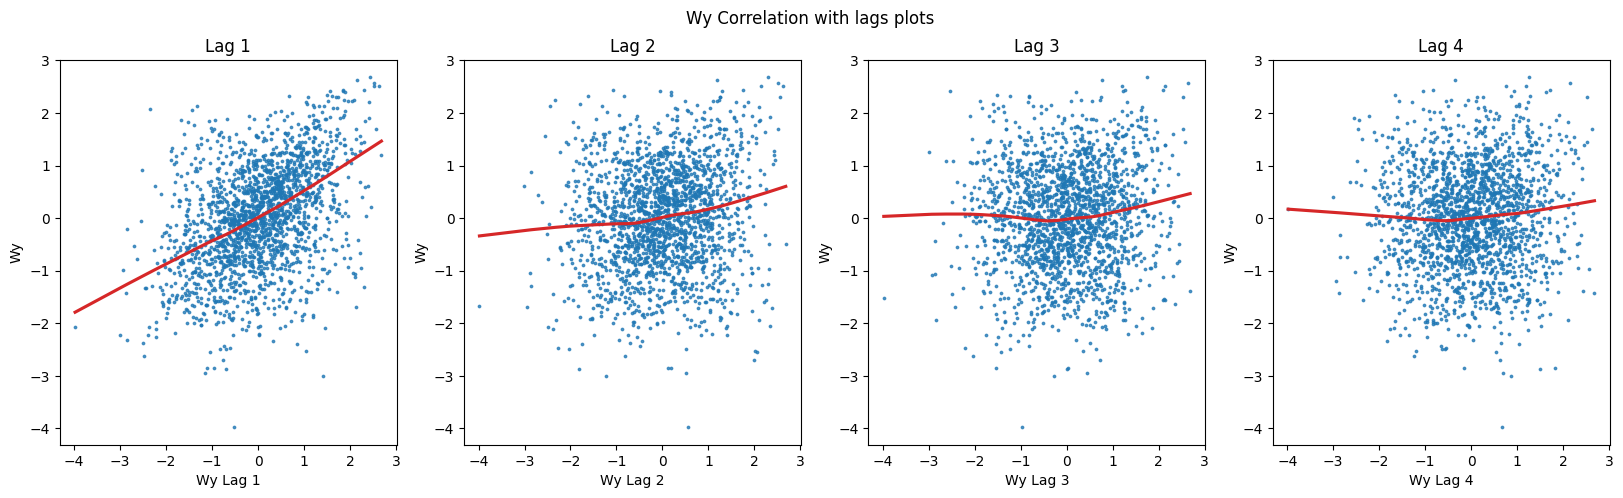

In [46]:
for col in ds.columns:
    plot_lags(col, 4)

#### Conclusions

- **Temp**: 3 lags
- **Humidity**: 1 lag
- **Pressure**: 1 lag
- **Wind X**: 1 lag
- **Wind Y**: 1 lag
- **Clouds**: 1 lag
- **Dew point**: 2 lags

### Lag creation

In [47]:
def make_lags(ds, column, no):
    lags = pd.DataFrame()

    for i in range(1, no + 1):
        lags[f"{column}_lag{i}"] = ds[column].shift(i)

    return lags.bfill()

In [48]:
columns = ds.columns

In [49]:
ds = ds.reset_index()

In [50]:
lags = {
    "Temperature" : 3,
    "Relative Humidity" : 1,
    "Pressure" : 1,
    "Wx" : 1,
    "Wy" : 1,
    "Clouds" : 1,
    "Dew point": 2
    }

In [51]:
for col in columns:
    ds = ds.join(make_lags(ds, col, lags[col]), validate='1:1')

In [52]:
ds = ds.set_index(index)

In [53]:
ds

Temperature  Pressure  Relative Humidity    Clouds  Dew point  \
Year Month Day                                                                  
2020 1     1      -1.164736  1.709511           0.463224 -0.054396  -1.188330   
           2      -1.270771  2.095565           1.127552  0.347051  -1.231508   
           3      -1.340721  1.654659           0.958777 -0.322028  -1.383450   
           4      -1.375140  0.774414           1.027005  0.597955  -1.511344   
           5      -1.410115  0.642247           0.728955 -0.338755  -1.332074   
...                     ...       ...                ...       ...        ...   
2025 6     2       0.819945  0.081712          -0.254968 -0.138031   1.117587   
           3       0.956514 -0.149712           0.161584 -0.020942   1.305602   
           4       0.982051  0.038353           0.768456 -0.690021   1.460823   
           5       1.128612 -0.109487          -0.165194 -0.606386   1.536248   
           6       1.242974 -0.160682          -0.517108 -1.258738   1.467929   

                      Wx        Wy  Temperature_lag1  Temperature_lag2  \
Year Month Day                                                           
2020 1     1    1.171114 -1.694986         -1.164736         -1.164736   
           2    0.374636 -0.599129         -1.164736         -1.164736   
           3    0.198787 -0.035757         -1.270771         -1.164736   
           4    0.056570 -0.151403         -1.340721         -1.270771   
           5    1.601190 -1.494675         -1.375140         -1.340721   
...                  ...       ...               ...               ...   
2025 6     2    0.086017  0.567447          0.647847          0.452987   
           3   -0.375597  0.383845          0.819945          0.647847   
           4   -0.107101  0.607769          0.956514          0.819945   
           5   -0.333628  0.821099          0.982051          0.956514   
           6   -0.102859  0.242171          1.128612          0.982051   

                Temperature_lag3  Pressure_lag1  Relative Humidity_lag1  \
Year Month Day                                                            
2020 1     1           -1.164736       1.709511                0.463224   
           2           -1.164736       1.709511                0.463224   
           3           -1.164736       2.095565                1.127552   
           4           -1.164736       1.654659                0.958777   
           5           -1.270771       0.774414                1.027005   
...                          ...            ...                     ...   
2025 6     2            0.390255       0.263507                0.337541   
           3            0.452987       0.081712               -0.254968   
           4            0.647847      -0.149712                0.161584   
           5            0.819945       0.038353                0.768456   
           6            0.956514      -0.109487               -0.165194   

                Clouds_lag1  Dew point_lag1  Dew point_lag2   Wx_lag1  \
Year Month Day                                                          
2020 1     1      -0.054396       -1.188330       -1.188330  1.171114   
           2      -0.054396       -1.188330       -1.188330  1.171114   
           3       0.347051       -1.231508       -1.188330  0.374636   
           4      -0.322028       -1.383450       -1.231508  0.198787   
           5       0.597955       -1.511344       -1.383450  0.056570   
...                     ...             ...             ...       ...   
2025 6     2      -0.305301        1.096271        0.622954  0.000754   
           3      -0.138031        1.117587        1.096271  0.086017   
           4      -0.020942        1.305602        1.117587 -0.375597   
           5      -0.690021        1.460823        1.305602 -0.107101   
           6      -0.606386        1.536248        1.460823 -0.333628   

                 Wy_lag1  
Year Month Day            
2020 1     1   -1.6

### Saving the dataset

In [54]:
ds.to_csv("../data/dataset.csv")

In [55]:
params = yaml.safe_load(open("../models/params.yaml"))

params['dataset']['rows'] = ds.shape[0]
params['dataset']['columns'] = ds.shape[1]

yaml.dump(params, open("../models/params.yaml", 'w'))

In [56]:
prediction_config = yaml.safe_load(open("../prediction_config.yaml"))

for column in ds:
    if "_lag" not in column:
        prediction_config[column]['max_value'] = float(ds[column].max())
        prediction_config[column]['min_value'] = float(ds[column].min())

yaml.dump(prediction_config, open("../prediction_config.yaml", 'w'))